In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/adity/OneDrive/Desktop/car data.csv")


In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:

# Check for missing values
print(df.isnull().sum())

# Drop irrelevant columns (if any)
df = df.drop(columns=['Car_Name'])  # Dropping Car_Name assuming it's not relevant for prediction

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)  # Use drop_first=True to avoid dummy variable trap

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [9]:
# Initialize a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 1.1229352597802205
R-squared: 0.9605630628105095


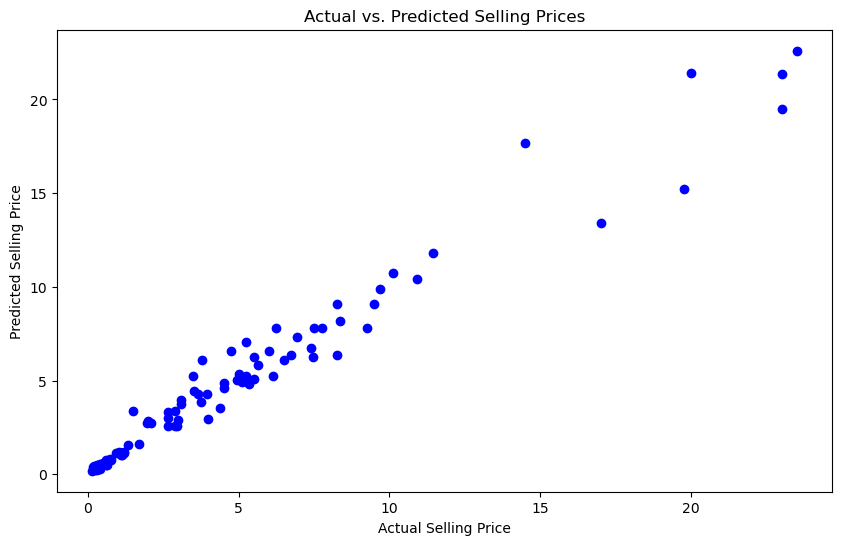

In [10]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()